# Numerical Methods for Scalar-Advective Equation

**Author: Jiwoong 'Alex' Choi** <br>
**Date: March 25, 2025**

## Introduction

In this report, we will apply various numerical methods to solve the **scalar advective equation**:

$$ u_t + c u_x = 0. $$

For simplicity, we set the wave speed $ c = 1 $ and assume the initial condition:

$$ u_0(x) = u(x, 0) = \sin(x). $$

We solve this **initial value problem (IVP)** in the domain $ x \in [0, 2\pi] $ with **periodic boundary conditions**:

$$ u(0, t) = u(2\pi, t). $$

### Analytical Solution

The exact solution to this equation is given by:

$$ u(x, t) = \sin(x - t). $$

Since the problem is periodic, at integer multiples of $ t = 2\pi m $ (where $ m $ is a positive integer), the solution returns to its initial condition:

$$ u(x, 2\pi m) = \sin(x - 2\pi m) = \sin(x). $$

### Computational Setup

We discretize the spatial domain using $ N $ **interior grid points**, with a **grid spacing**:

$$ h = \frac{2\pi}{N+1}. $$

The grid points are given by:

$$ x_i = i h, \quad i = 1, \dots, N. $$

We also define the numerical solution at these points:

$$ U_i^n, $$

which represents the approximation of $ u(x_i, t_n) $ at **time step** $ t_n = n k $, where $ k $ is the time step size and $ n $ is the discrete time index.

This notebook will explore **different numerical methods** for solving the problem and compare their performance with the analytical solution.

---

## Question 1

### 1a
$$
\textbf{Recall: Implicit Central Method.}
$$

$$
U_i^{n+1} = U_i^n - \frac{\sigma}{2} \left( U_{i+1}^{n+1} - U_{i-1}^{n+1} \right) \quad (1)
$$

$$
\textbf{Note: } x_1 = 0 \text{ and } x_5 = 2\pi \text{ suggests } U_0 = U_4 \text{ and } U_6 = U_2
$$

$$
U_1^{n+1} = U_1^n - \frac{\sigma}{2} \left( U_2^{n+1} - U_0^{n+1} \right)
$$

$$
= U_1^n - \frac{\sigma}{2} \left( U_2^{n+1} - U_4^{n+1} \right) \quad (2)
$$

$$
U_2^{n+1} = U_2^n - \frac{\sigma}{2} \left( U_3^{n+1} - U_1^{n+1} \right) \quad (3)
$$

$$
U_3^{n+1} = U_3^n - \frac{\sigma}{2} \left( U_4^{n+1} - U_2^{n+1} \right) \quad (4)
$$

$$
U_4^{n+1} = U_4^n - \frac{\sigma}{2} \left( U_5^{n+1} - U_3^{n+1} \right) \quad (5)
$$

$$
U_5^{n+1} = U_5^n - \frac{\sigma}{2} \left( U_6^{n+1} - U_4^{n+1} \right)
$$

$$
= U_5^n - \frac{\sigma}{2} \left( U_2^{n+1} - U_4^{n+1} \right) \quad (6)
$$

$$
(3), (4), (5) \text{ are not affected by Periodic Boundary Conditions.}
$$

$$
(2) \text{ had } U_0^{n+1}, \text{ which we replaced with } U_4^{n+1}.
$$

$$
(6) \text{ had } U_6^{n+1}, \text{ which we replaced with } U_2^{n+1}.
$$

$$
\textbf{Turning these into algebraic form:}
$$

i) Move everything to LHS except $U_i^n$

$$
U_1^{n+1} + \frac{\sigma}{2} U_2^{n+1} - \frac{\sigma}{2} U_4^{n+1} = U_1^n
$$

$$
- \frac{\sigma}{2} U_1^{n+1} + U_2^{n+1} + \frac{\sigma}{2} U_3^{n+1} = U_2^n
$$

$$
- \frac{\sigma}{2} U_2^{n+1} + U_3^{n+1} + \frac{\sigma}{2} U_4^{n+1} = U_3^n
$$

$$
- \frac{\sigma}{2} U_3^{n+1} + U_4^{n+1} + \frac{\sigma}{2} U_5^{n+1} = U_4^n
$$

$$
\frac{\sigma}{2} U_2^{n+1} - \frac{\sigma}{2} U_4^{n+1} + U_5^{n+1} = U_5^n
$$

ii) Multiply both sides by 2

$$
2 U_1^{n+1} + \sigma U_2^{n+1} - \sigma U_4^{n+1} = 2U_1^n
$$

$$
- \sigma U_1^{n+1} + 2U_2^{n+1} + \sigma U_3^{n+1} = 2U_2^n
$$

$$
- \sigma U_2^{n+1} + 2U_3^{n+1} + \sigma U_4^{n+1} = 2U_3^n
$$

$$
- \sigma U_3^{n+1} + 2U_4^{n+1} + \sigma U_5^{n+1} = 2U_4^n
$$

$$
\sigma U_2^{n+1} - \sigma U_4^{n+1} + 2U_5^{n+1} = 2U_5^n
$$

iii) Turn them into matrix-vector form.

$$
\begin{pmatrix}
2 & \sigma & 0 & -\sigma & 0 \\
-\sigma & 2 & \sigma & 0 & 0 \\
0 & -\sigma & 2 & \sigma & 0 \\
0 & 0 & -\sigma & 2 & \sigma \\
0 & \sigma & 0 & -\sigma & 2
\end{pmatrix}
\begin{pmatrix}
U_1^{n+1} \\
U_2^{n+1} \\
U_3^{n+1} \\
U_4^{n+1} \\
U_5^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
2U_1^n \\
2U_2^n \\
2U_3^n \\
2U_4^n \\
2U_5^n
\end{pmatrix}.
$$


### 1b

#### Five Equations of Lax-Wendroff Method
$$
U_1^{n+1} = U_1^n - \frac{\sigma}{2} (U_2^n - U_0^n) + \frac{\sigma^2}{2} (U_2^n - 2U_1^n + U_0^n)
$$

$$
= U_1^n - \frac{\sigma}{2} (U_2^n - U_4^n) + \frac{\sigma^2}{2} (U_2^n - 2U_1^n + U_4^n) \quad (9)
$$

$$
U_2^{n+1} = U_2^n - \frac{\sigma}{2} (U_3^n - U_1^n) + \frac{\sigma^2}{2} (U_3^n - 2U_2^n + U_1^n) \quad (10)
$$

$$
U_3^{n+1} = U_3^n - \frac{\sigma}{2} (U_4^n - U_2^n) + \frac{\sigma^2}{2} (U_4^n - 2U_3^n + U_2^n) \quad (11)
$$

$$
U_4^{n+1} = U_4^n - \frac{\sigma}{2} (U_5^n - U_3^n) + \frac{\sigma^2}{2} (U_5^n - 2U_4^n + U_3^n) \quad (12)
$$

$$
U_5^{n+1} = U_5^n - \frac{\sigma}{2} (U_6^n - U_4^n) + \frac{\sigma^2}{2} (U_6^n - 2U_5^n + U_4^n)
$$

$$
= U_5^n - \frac{\sigma}{2} (U_2^n - U_4^n) + \frac{\sigma^2}{2} (U_2^n - 2U_5^n + U_4^n) \quad (13)
$$


#### Local Truncation Error using Taylor Expansion for Lax-Wendroff method.

**(i) Move every term to LHS in (8) and replace $ U $ with $ u $**

$$
u_i^{n+1} - u_i^n + \frac{\sigma}{2} \left( u_{i+1}^n - u_{i-1}^n \right) - \frac{\sigma^2}{2} \left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right) \neq 0
$$

**(ii) Divide by $k$ as LTE is w.r.t. per time-step**

$$
\frac{1}{k} \left( u_i^{n+1} - u_i^n \right) + \frac{c}{2h} \left( u_{i+1}^{n} - u_{i-1}^{n} \right) - \frac{c^2 k}{2h^2} \left( u_{i+1}^{n} - 2u_i^n + u_{i-1}^{n} \right) = L_h
$$ 

**(iii) Taylor Expand $u(x,t)$ to $u(x,t+k)$**

$$
u_i^{n+1} = u_i^n + u_t k + u_{tt} \frac{k^2}{2} + u_{ttt} \frac{k^3}{6} + u_{tttt} \frac{k^4}{24} + \mathcal{O}(k^5)
$$


**(iv) Taylor Expand $u(x,t)$ to $u(x-h, t)$**

$$
u_{i-1}^{n} = u_i^n - u_x h + u_{xx} \frac{h^2}{2} - u_{xxx} \frac{h^3}{6} + u_{xxxx} \frac{h^4}{24} + \mathcal{O}(h^5)
$$

**(v) Taylor Expand $u(x,t)$ to $u(x+h, t)$**

$$
u_{i+1}^{n} = u_i^n + u_x h + u_{xx} \frac{h^2}{2} + u_{xxx} \frac{h^3}{6} + u_{xxxx} \frac{h^4}{24} + \mathcal{O}(h^5)
$$


**(vi) Substituting Time Derivatives with Spatial Derivatives**

$$
u_t + C u_x = 0 \Rightarrow u_t = -C u_x
$$

$$
u_{tt} = -C u_{xt} = -C u_{tx} = -C (-C u_{xx}) = C^2 u_{xx}
$$

$$
u_{ttt} = C^2 u_{xxt} = c^2 u_{txx} = C^2 (-C u_{xxx}) = -C^3 u_{xxx}
$$

$$
u_{tttt} = -C^3 u_{xxxt} = -C^3 u_{txxx} -C^3 (-C u_{xxxx}) = C^4 u_{xxxx}
$$


**Expanding the Finite Difference Terms To Make Our Life Easier Later:**
$$
u_{i+1}^n - u_{i-1}^n = 2 u_x h + 2 u_{xxx} \frac{h^3}{6}
$$

$$
u_{i+1}^n + u_{i-1}^n = 2 u_i^n + 2 u_{xx} \frac{h^2}{2} + 2 u_{xxxx} \frac{h^4}{24}
$$

**Substituting into the LTE Equation:**
$$
L_h = \frac{1}{k} \left( u_t + C^2 u_{xx} \frac{k^2}{2} - C^3 u_{xxx} \frac{k^3}{6} + C^4 u_{xxxx} \frac{k^4}{24} \right)
$$

$$
+ \frac{C}{2h} \left( 2 u_x h + 2 u_{xxx} \frac{h^3}{6} \right) 
- \frac{C^2 k}{2h^2} \left( 2 u_i^n + 2 u_{xx} \frac{h^2}{2} + 2 u_{xxxx} \frac{h^4}{24} - 2 u_i^n \right)
$$

**Simplifying:**
$$
L_h = u_t + \frac{C^2 k}{2} u_{xx} - \frac{C^3 k^2}{6} u_{xxx} + \frac{C^4 k^3}{24} u_{xxxx}
$$

$$
+ C u_x + \frac{C h^2}{6} u_{xxx} - \frac{C^2 k}{2} u_{xx} - \frac{C^2 k h^2}{24} u_{xxxx}
$$

**Final Grouping:**
$$
L_h = \frac{u_{xxx}}{6} (C h^2 - C^3 k^2) + \frac{u_{xxxx}}{24} (C^4 k^3 - C^2 h^2 k)
$$

$$
L_h = \frac{h^2 h}{6k} \sigma (1 - \sigma^2) u_{xxx} + \frac{h^3 h}{24k} \sigma^2 (\sigma^2 - 1)
$$

$$
L_h = -\frac{h^2 h}{6k} \sigma (1 - \sigma^2) u_{xxx} + \frac{h^3 h}{24k} \sigma^2 (1 - \sigma^2)
$$

From our final form, we can see that the **order of LW method is *second*** as our leading error term is associated with $u_{xxx}$ and it has coefficients $-\frac{h^2 h}{6k}$. However, $\frac{h}{k}$ is a constant, thus what determines our order as $h \rightarrow 0$ is $h^2$ value. **Hence, this is a second order method.**

---

## Question 2

### **Overview of the `wave_solver.py` Script**
The **`wave_solver.py`** script is responsible for numerically solving the **scalar advection equation** using four different numerical methods. Each method applies a different finite-difference scheme to approximate the solution over time. **The solver is attached at the very end of this PDF**.

### Implemented Numerical Methods
The script supports the following four schemes:

1. **First-Order Upwind (`forward-upwind`)** – A first-order explicit method that introduces numerical diffusion, making it stable for certain Courant numbers but less accurate.  
2. **Implicit-Central (`implicit-central`)** – A second-order implicit method that forms a system of linear equations to solve for the next time step, providing better stability but requiring matrix inversion.  
3. **Beam-Warming (`beam-warming`)** – A second-order explicit upwind scheme that reduces numerical diffusion compared to the first-order upwind method.  
4. **Lax-Wendroff (`lax-wendroff`)** – A second-order explicit scheme that introduces dispersion effects but provides higher accuracy in smooth regions.

### Numerical Approach
- **For the implicit method (`implicit-central`)**, we reformulate the problem as a system of **linear equations** and solve for the solution at the next time step using the solver.  
- **For explicit methods (`forward-upwind`, `beam-warming`, and `lax-wendroff`)**, we construct a **dU matrix** (representing the difference between the next time step and the current time step) and directly update the solution using matrix-vector multiplication.

### Detailed Explanation of Each Method

### **First-Order Upwind (FOU) Scheme**
The original update equation:

$$ U_i^{n+1} = U_i^n - \sigma (U_i^n - U_{i-1}^n) $$

#### Delta Form
Rearrange to define $\Delta U_i$:

$$ \Delta U_i = U_i^{n+1} - U_i^n = -\sigma U_i^n + \sigma U_{i-1}^n, \quad i = 0, \dots, N+1 $$

#### For $i = 0, \dots, N+1$
For $ i = 0 $, we use periodic boundary condition to change $i = -1$ to $i = -1 + N + 1 = N$:

$$ \Delta U_0 = -\sigma U_0^n + \sigma U^n_{-1} = -\sigma U_0^n + \sigma U_N^n$$

$$ \Delta U_1 = -\sigma U_1^n + \sigma U_0^n $$

$$ \Delta U_2 = -\sigma U_2^n + \sigma U_1^n $$

$$\vdots$$

$$ \Delta U_N = -\sigma U_N^n + \sigma U_{N-1}^n $$

$$ \Delta U_{N+1} = -\sigma U_{N+1}^n + \sigma U_N^n $$

#### Matrix-Vector Form
Expressing in matrix notation:

$$
\mathbf{\Delta U_i} = A \mathbf{\vec{U}}^n_i
$$

where:

$$
\begin{bmatrix}
-\sigma & 0 & 0 & \dots & \sigma & 0 \\
\sigma & -\sigma & 0 & \dots & 0 & 0 \\
0 & \sigma & -\sigma & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & \sigma & -\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^n \\
U_1^n \\
U_2^n \\
\vdots \\
U_N^n \\
U_{N+1}^n
\end{bmatrix}
$$

#### Solving
At each time step, we just continously add $\Delta U_i$ to $\mathbf{\vec{U}}^n_i$ to solve for $\mathbf{\vec{U}}^{n+1}_i$

### **Implicit-Center Scheme**
The original Finite Difference Equation (FDE):

$$ U_i^{n+1} = U_i^n - \frac{\sigma}{2} (U_{i+1}^{n+1} - U_{i-1}^{n+1}) $$

#### System of Equations
Since this is an implicit method, we must solve a system of equations to compute $\mathbf{\vec{U}}^{n+1}$.

$$ U_i^{n+1} + \frac{\sigma}{2} U_{i+1}^{n+1} - \frac{\sigma}{2} U_{i-1}^{n+1} = U_i^n, \quad i = 0, \dots, N+1 $$

Rearranging the equation:

$$ -\sigma U_{i-1}^{n+1} + 2 U_i^{n+1} + \sigma U_{i+1}^{n+1} = 2 U_i^n$$

#### For $i = 0, \dots, N+1$
For $ i = 0 $, we use periodic boundary condition to change $i = -1$ to $i = -1 + N + 1 = N$:

$$ -\sigma U_{-1}^{n+1} + 2 U_0^{n+1} + \sigma U_{1}^{n+1} = -\sigma U_N^{n+1} + 2 U_0^{n+1} + \sigma U_1^{n+1} = 2 U_0^n $$

$$ -\sigma U_0^{n+1} + 2 U_1^{n+1} + \sigma U_2^{n+1} = 2 U_1^n $$

$$ -\sigma U_1^{n+1} + 2 U_2^{n+1} + \sigma U_3^{n+1} = 2 U_2^n $$

$$\vdots$$

$$ -\sigma U_{N-1}^{n+1} + 2 U_N^{n+1} + \sigma U_{N+1}^{n+1} = 2 U_N^n $$

For $ i = N+1 $, we use periodic boundary condition to change $i = N+2$ to $i = 1$:

$$ -\sigma U_{N}^{n+1} + 2 U_{N+1}^{n+1} + \sigma U_{N+2}^{n+1} = -\sigma U_N^{n+1} + 2 U_{N+1}^{n+1} + \sigma U_1^{n+1} = 2 U_{N+1}^n $$


#### Matrix-Vector Form
Expressing in matrix notation:

$$
\mathbf{A} \mathbf{\vec{U}}_i^{n+1} = \mathbf{\vec{U}}^n_i
$$

where:

$$
\begin{bmatrix}
2 & \sigma & 0 & \dots & -\sigma & 0 \\
-\sigma & 2 & \sigma & \dots & 0 & 0 \\
0 & -\sigma & 2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 2 & \sigma \\
0 & \sigma & 0 & \dots & -\sigma & 2
\end{bmatrix}
\begin{bmatrix}
U_0^{n+1} \\
U_1^{n+1} \\
U_2^{n+1} \\
\vdots \\
U_N^{n+1} \\
U_{N+1}^{n+1}
\end{bmatrix}
=
\begin{bmatrix}
2 U_0^n \\
2 U_1^n \\
2 U_2^n \\
\vdots \\
2 U_N^n \\
2 U_{N+1}^n
\end{bmatrix}
$$

### Solving
At each time step, we solve for $\mathbf{\vec{U}}^{n+1}_i$.

---

## Question 3
### 3a
To analyze the accuracy of different numerical methods for solving the PDE, we will implement the **First-Order Upwind, Implicit-Central, Beam-Warming, and Lax-Wendroff** schemes. The solutions will be computed for Courant numbers $\sigma = \frac{c k}{h} = \text{0.25, 0.5, 0.75, 1.25}$ and evolved up to $T = 4\pi$

For each Courant number, we will generate a separate figure displaying the numerical solutions obtained from all four methods alongside the exact solution at $T = 4\pi $. This will allow for a direct visual comparison of their accuracy.

We will then compare and analyze the results by considering the effects of **dissipation errors** (which reduce amplitude) and **dispersion errors** (which cause phase shifts). By examining these numerical artifacts, we will explain how each method performs under different Courant numbers and discuss their strengths and weaknesses.

#### Plotting Each Numerical Methods Against the Exact Solution for Varying Courant Numbers

Time: 0.000000; Courant = 0.250000; Time step = 0.060415
Time: 0.060415; Courant = 0.250000; Time step = 0.060415
Time: 0.120830; Courant = 0.250000; Time step = 0.060415
Time: 0.181246; Courant = 0.250000; Time step = 0.060415
Time: 0.241661; Courant = 0.250000; Time step = 0.060415
Time: 0.302076; Courant = 0.250000; Time step = 0.060415
Time: 0.362491; Courant = 0.250000; Time step = 0.060415
Time: 0.422907; Courant = 0.250000; Time step = 0.060415
Time: 0.483322; Courant = 0.250000; Time step = 0.060415
Time: 0.543737; Courant = 0.250000; Time step = 0.060415
Time: 0.604152; Courant = 0.250000; Time step = 0.060415
Time: 0.664568; Courant = 0.250000; Time step = 0.060415
Time: 0.724983; Courant = 0.250000; Time step = 0.060415
Time: 0.785398; Courant = 0.250000; Time step = 0.060415
Time: 0.845813; Courant = 0.250000; Time step = 0.060415
Time: 0.906229; Courant = 0.250000; Time step = 0.060415
Time: 0.966644; Courant = 0.250000; Time step = 0.060415
Time: 1.027059; Courant = 0.250

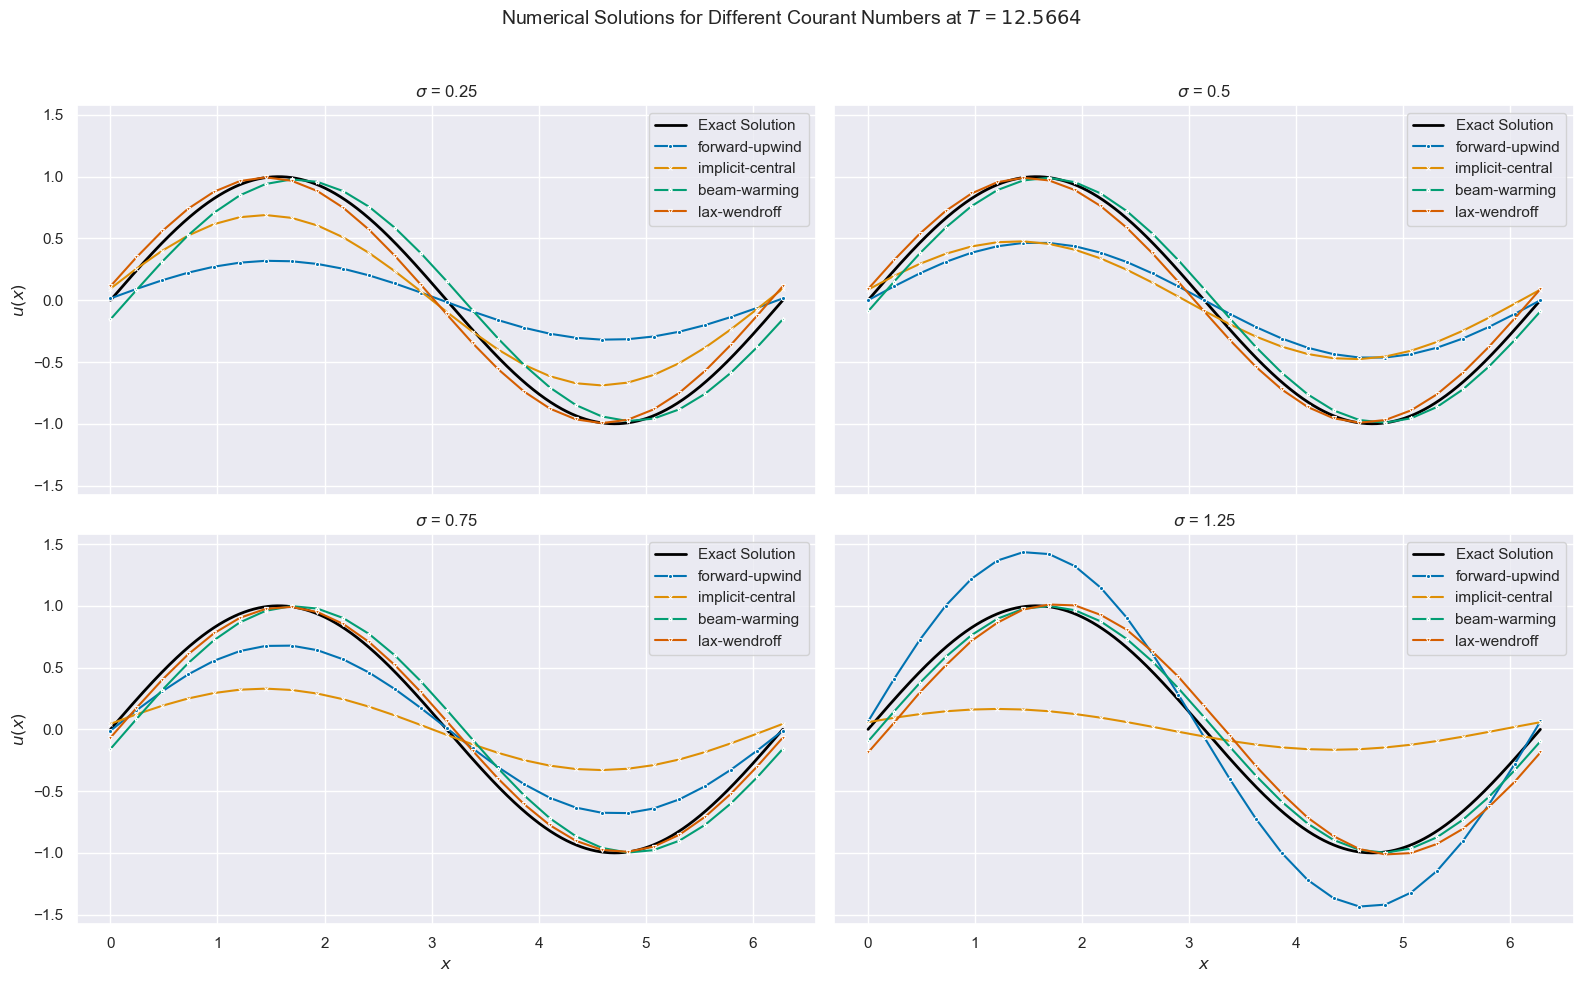

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wave_solver import wave_solve

# Define Courant numbers and numerical methods
Courant_nums = [0.25, 0.5, 0.75, 1.25]
methods = ["forward-upwind", "implicit-central", "beam-warming", "lax-wendroff"]
markers = ['o', 'x', '*', 'v']
T = 4 * np.pi  # Final time
n = 25  # Number of interior points
advec_speed = 1  # advective speed
domain = 2 * np.pi  # Spatial domain

# Set up Seaborn with high-contrast color palette
sns.set_theme(style="darkgrid")
palette = sns.color_palette("colorblind", n_colors=len(methods))

# Set up figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle(f"Numerical Solutions for Different Courant Numbers at $T$ = ${T:.4f}$", fontsize=14)

# Fine spatial grid for exact solution
x_exact = np.linspace(0, domain, 2000)  # Very fine grid for smooth exact solution
u_exact = np.sin(x_exact - advec_speed * T)  # Recall exact general sol: u0(x - ct) = u(x,t)

# Iterate over Courant numbers
for i, Courant_num in enumerate(Courant_nums):
    ax = axes[i // 2, i % 2]  # Select appropriate subplot
    # Plot exact solution in black
    sns.lineplot(x=x_exact, y=u_exact, linestyle="-", linewidth=2, color = 'black', label="Exact Solution", ax=ax)

    # Solve and plot for each numerical method using Seaborn
    for j, method in enumerate(methods):
        # compute sol
        out = wave_solve(c = advec_speed, L = domain, n = n, Courant = Courant_num, T = T, M = 0, u0 = lambda x: np.sin(x), method = method)
        # plot it
        sns.lineplot(x=out['x'], y=out['U'][:, -1], linewidth=1.5, marker=markers[j], markersize=3, color=palette[j], label=method, ax=ax)

    # Formatting
    ax.set_title(f"$\sigma$ = {Courant_num}")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$u(x)$")
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Analysis of Accuracies

For all Courant numbers, as expected, the higher-order **$O(h^2)$ methods** (**Beam-Warming (BW) and Lax-Wendroff (LW)**) align much more closely with the exact solution compared to the **first-order $O(h^1)$ methods** (**Forward-Upwind (FW) and Implicit-Central (IC)**). The amplitude errors for BW and LW are minimal and nearly indistinguishable, whereas their phase errors are present but relatively small. Forward-Upwind and Implicit-Central, however, exhibits severe dissipation, completely damping out higher-frequency components.

As expected, **FW and IC methods exhibit dominant amplitude errors** across all Courant numbers. This is consistent with their dissipative leading error term ($u_{xx}$) in their **Local Truncation Error (LTE)** expressions:

For **Forward-Upwind (FOU):**
$$
L_h(x,t) = \frac{h^2}{2k} \sigma(1-\sigma) u_{xx} - \frac{h^3}{6k} \sigma(1-\sigma^2) u_{xxx} + \frac{h^4}{24k} \sigma(1-\sigma^3) u_{xxxx}
$$
For **Implicit-Central (IC):**
$$
L_h(x,t) = \frac{h^2}{2k} \sigma^2 u_{xx} - \frac{h^3}{6k} \sigma(2\sigma^2 + 1) u_{xxx} + \frac{h^4}{24k} \sigma^2(3\sigma^2 + 4) u_{xxxx}
$$
Since both methods contain **leading-order dissipative error ($u_{xx}$ term)**, they suppress or increase wave  amplitudes, leading to **dissipation** and **energy loss** in the numerical solution.

In contrast, **BW and LW methods exhibit stronger phase errors**, as their **leading error term ($u_{xxx}$) is dispersive rather than dissipative**:

For **Beam-Warming (BW):**
$$
L_h(x,t) = \frac{h^2}{6k} \sigma(1-\sigma)(2-\sigma) u_{xxx} - \frac{h^3}{24k} \sigma(1-\sigma)(2-\sigma)(3+\sigma) u_{xxxx}
$$
For **Lax-Wendroff (LW):**
$$
L_h(x,t) = -\frac{h^2}{6k} \sigma(1-\sigma^2) u_{xxx} + \frac{h^3}{24k} \sigma^2(1-\sigma^2) u_{xxxx}
$$
Since **BW and LW methods primarily contain dispersive errors ($u_{xxx}$ term)**, they shift wave peaks and introduce **phase errors** while better preserving amplitude.

#### Effect of Courant Number on Stability and Accuracy
For all methods, **Courant numbers of $\sigma = 0.25, 0.5, 0.75$ produce stable solutions** without explosive growth. However, key differences emerge:

- **At $\sigma = 0.75$**, solutions show **higher accuracy**, particularly for **higher-order methods**.
- **At $\sigma = 0.5$**, numerical solutions are more consistent between methods of the same order, making it a good choice for balanced accuracy and stability.
- **At $\sigma = 1.25$**, a **small numerical explosion is observed in the FOU scheme**, which aligns with its **stability constraint of $0 \leq \sigma \leq 1$**. This instability occurs because FOU is only **conditionally stable** under this requirement. Implicit-Central exhibits significant disspiation. Meanwhile, Beam-Warming and Lax-Wendroff remain stable.

### 3b: Numerical Analysis at $\sigma = 1$

In this section, we investigate the behavior of our numerical methods when the **Courant number is set to $\sigma = 1$**, a special case in numerical advection schemes. Using the **First-Order Upwind, Implicit-Central, Beam-Warming, and Lax-Wendroff** methods, we integrate the PDE up to **$T = 4\pi$** and compare the results against the exact solution.  

We will generate a **single figure** displaying the numerical solutions from all four methods at **$T = 4\pi$** to examine their accuracy and stability at this particular Courant number.  

Our analysis will:
- **Compare numerical accuracy** at $\sigma = 1$ relative to previous results at other Courant numbers.
- **Identify dominant numerical errors** (dissipation vs. dispersion) and discuss their effects.
- **Explain stability behavior**, particularly why some methods may be more or less accurate at this special Courant number.
- **Discuss why $\sigma = 1$ is sometimes called the "golden ratio"** in numerical advection schemes.

Time: 0.000000; Courant = 1.000000; Time step = 0.241661
Time: 0.241661; Courant = 1.000000; Time step = 0.241661
Time: 0.483322; Courant = 1.000000; Time step = 0.241661
Time: 0.724983; Courant = 1.000000; Time step = 0.241661
Time: 0.966644; Courant = 1.000000; Time step = 0.241661
Time: 1.208305; Courant = 1.000000; Time step = 0.241661
Time: 1.449966; Courant = 1.000000; Time step = 0.241661
Time: 1.691627; Courant = 1.000000; Time step = 0.241661
Time: 1.933288; Courant = 1.000000; Time step = 0.241661
Time: 2.174949; Courant = 1.000000; Time step = 0.241661
Time: 2.416610; Courant = 1.000000; Time step = 0.241661
Time: 2.658271; Courant = 1.000000; Time step = 0.241661
Time: 2.899932; Courant = 1.000000; Time step = 0.241661
Time: 3.141593; Courant = 1.000000; Time step = 0.241661
Time: 3.383254; Courant = 1.000000; Time step = 0.241661
Time: 3.624915; Courant = 1.000000; Time step = 0.241661
Time: 3.866576; Courant = 1.000000; Time step = 0.241661
Time: 4.108237; Courant = 1.000

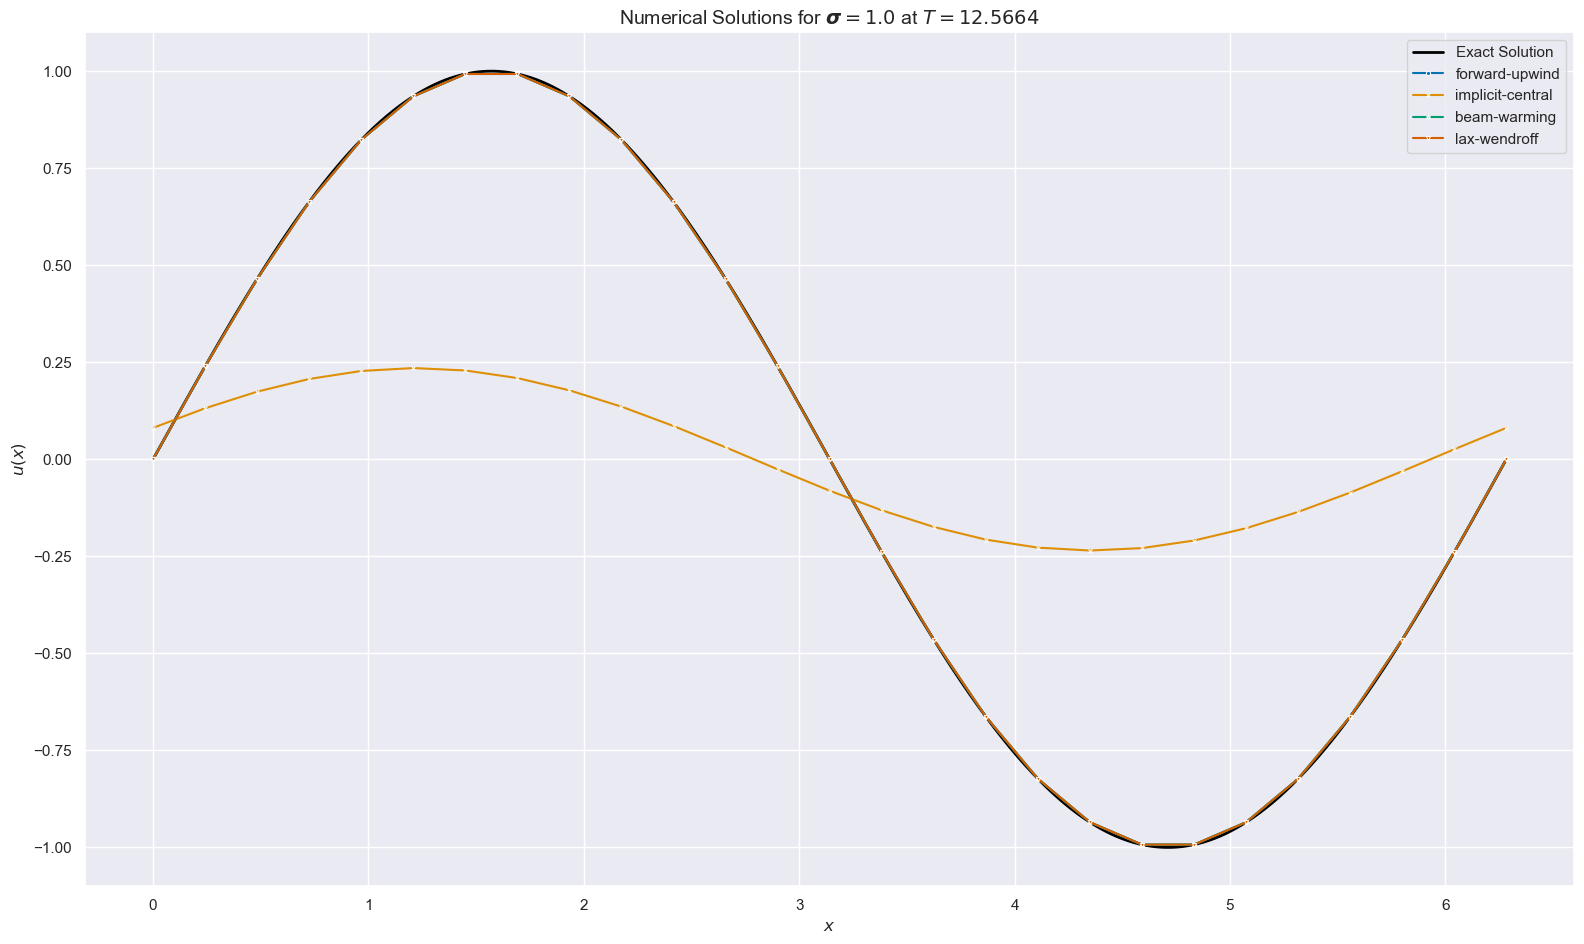

In [3]:
# Set up a figure
plt.figure(figsize=(16, 10))

# Fine spatial grid for exact solution
x_exact = np.linspace(0, domain, 2000)  # Very fine grid for smooth exact solution
u_exact = np.sin(x_exact - advec_speed * T)  # Recall exact general sol: u0(x - ct) = u(x,t)
# plot the exact sol
sns.lineplot(x=x_exact, y=u_exact, linewidth = 2.0, color = 'black', label = 'Exact Solution')

# Iterate over Courant numbers
for i, method in enumerate(methods):
    # compute sol for Courant = 1
    out = wave_solve(c = advec_speed, L = domain, n = n, Courant = 1.0, T = T, M = 0, u0 = lambda x: np.sin(x), method = method)
    # plot it
    sns.lineplot(x=out['x'], y=out['U'][:, -1], linewidth=1.5, marker=markers[i], markersize=3, color=palette[i], label=method)

# Formatting
plt.title(r"Numerical Solutions for $\boldsymbol{\sigma} = 1.0$ at $T = %.4f$" % T, fontsize=14)
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.legend()
plt.grid(True)
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Analysis of Accuracies

From the plot above, we can understand why $\sigma = 1.0$ is considered *golden raito* in numerical schemes for PDEs. Except the implicit-central method, all other numerical methods follow the exact solution extremely closely with almost zero amplitutde and phase errors, almost being indistinguishable. Even the first-order-upwind scheme is stable and very accurate, showing no signs of noticeable amplitude and phase error, unlike from 3a. Similalry, at $\sigma = 1.0$, the noticeable phase errors for BW and LW methods are not visible here.

#### Explanation of Golden Ratio through LTE expressions.

Let us plug in $\sigma = 1$ to all of our local truncation error expressions and see how we get this extreme accuracy and why IC scheme still has significant amplitude error.

For **Forward-Upwind (FOU):**
$$
L_h(x,t) = \frac{h^2}{2k} \sigma(1-\sigma) u_{xx} - \frac{h^3}{6k} \sigma(1-\sigma^2) u_{xxx} + \frac{h^4}{24k} \sigma(1-\sigma^3) u_{xxxx}
         = \frac{h^2}{2k} (0) u_{xx} - \frac{h^3}{6k} (0) u_{xxx} + \frac{h^4}{24k} (0) u_{xxxx} = \mathbf{0}
$$
As you can see, according to our expression, there are no errors when we have Courant number of 1, showing neither disspative nor dispersion error.

For **Implicit-Central (IC):**
$$
L_h(x,t) = \frac{h^2}{2k} \sigma^2 u_{xx} - \frac{h^3}{6k} \sigma(2\sigma^2 + 1) u_{xxx} + \frac{h^4}{24k} \sigma^2(3\sigma^2 + 4) u_{xxxx} 
        = \frac{h^2}{2k} u_{xx} - \frac{h^3}{6k} (3) u_{xxx} + \frac{h^4}{24k} (7) u_{xxxx} \neq \mathbf{0}
$$
Aligning with our plot, IC scheme still exhibits non-zero local truncation error value when $\sigma = 1$.

For **Beam-Warming (BW):**
$$
L_h(x,t) = \frac{h^2}{6k} \sigma(1-\sigma)(2-\sigma) u_{xxx} - \frac{h^3}{24k} \sigma(1-\sigma)(2-\sigma)(3+\sigma) u_{xxxx}
         = \frac{h^2}{6k} (0) u_{xxx} - \frac{h^3}{24k} (0)(4) u_{xxxx} = \mathbf{0}
$$
Similr to FOU scheme, our expression leas to the conclusion that BW methos' local truncation error is **zero** due to zero contributions from both amplitude and phase error terms.

For **Lax-Wendroff (LW):**
$$
L_h(x,t) = -\frac{h^2}{6k} \sigma(1-\sigma^2) u_{xxx} + \frac{h^3}{24k} \sigma^2(1-\sigma^2) u_{xxxx}
         = -\frac{h^2}{6k} (0) u_{xxx} + \frac{h^3}{24k} (0) u_{xxxx} = \mathbf{0}
$$
Again, for LW scheme, error is zero.


Thus, at $\sigma=1$, the FOU, BW, and LW methods exhibit near-perfect accuracy due to the cancellation of leading-order error terms, while IC still suffers from dissipation.

---

## Wave Solver Function Script

In [4]:
def wave_solve(c: float, L:float, n:int, Courant:float, T:float, M:int, u0, method:str) -> dict:
    """
    Parameters:
        c : float
            Advective speed (assumed positive).
        L : float
            Domain size [0, L].
        n : int
            Number of interior grid points.
        Courant : float
            Courant number.
        T : float
            Final time.
        M : int
            Number of solution snapshots between [0, T]
        u0 : callable
            Initial condition function: u0(x_array) -> array of same length.
        method : str
            One of {'forward-upwind', 'implicit-central', 'beam-warming', 'lax-wendroff'}.
`
    Returns
        dict:
            A dictionary with:
                out['h']   : float, spatial grid spacing
                out['k']   : float, base time step size
                out['l']   : int,   total number of time steps taken
                out['x']   : 1D array, spatial grid from 0 to L
                out['TT']  : 1D array, times at which solutions are recorded
                out['U']   : 2D array, solution snapshots; out['U'][:, j] is the solution at time out['TT'][j]
    """
    # Initialize output
    result = {}
    
    ###############################################
    # 1. Spatial grid
    h = L / (n + 1)  # get the space-step-size
    result['h'] = h 
    
    # generate spatial points to compute solutions about:
    spatial_grid = np.linspace(0, L, n+2)  # n interior points => n+2 total
    result['x'] = spatial_grid
    N = len(spatial_grid)  # number of total points, should be equal to n+2
    exit(f"Total Number of Points (N = {N}) doesn't equal Number of Interior Points (n) + 2 = {n+2}") if N != n+2 else None
    ###############################################
    # 2. Times at which we store solutions
    TT = np.linspace(0, T, M+2)  # from 0 to T, M+2 points
    result['TT'] = TT
    ###############################################
    # 3. ideal Time-step size from user-defined Courant number
    k = Courant * h / c # biggest time-step-size that can be taken while preserving stability
    result['k'] = k
    ###############################################
    # 4. Build/update coeff matrix based on method
    match method.lower():
        case'forward-upwind':
            if c < 0:
                raise ValueError("Please specify a positive advective speed.")
            # Create an N×N matrix A for delta U, for (-U^n_i + U^n_i-1)
            A = -np.diag(np.ones(N)) + np.diag(np.ones(N-1), k=-1)
            # Periodic boundary condition on U(1) = U0 equals U_N
            A[0, n] = 1.0

        case 'implicit-central':
            Courant_stable = min(TT[1] - TT[0], k) * c / h
            # need ot create a Coeff * U_new = U_old system.
            A = np.zeros(shape = (N, N))
            # main diagonals are 2s:
            np.fill_diagonal(A, 2)
            # sub-diagonals are -Courant
            np.fill_diagonal(A[1:], -Courant_stable)
            # super-diags are +Courant
            np.fill_diagonal(A[:-1, 1:], Courant_stable)
            # apply bounary conditions
            A[0, n] = -Courant_stable # for left boundary, U_-1  = U_n
            A[-1,1] = Courant_stable # for right boundary, U_n+2 = U_1

        case 'beam-warming':
            # create N by N matrix
            A = np.zeros(shape=(N, N))
            alpha = (Courant**2 - Courant) / 2 # coeff in front of U_i-2 term
            beta = 2*Courant - Courant**2 # coeff in front of U_i-1 term
            gamma = (Courant ** 2 - 3*Courant) / 2 # coeff. in front of U_i term:
            # main diagonals
            np.fill_diagonal(A, val = gamma)
            # sub diagonals
            np.fill_diagonal(A[1:], beta)
            # sub-sub diagonal
            np.fill_diagonal(A[2:], alpha)
            # apply Periodic BCs:
            # for the i = 0 or the 1st row:
            ## i = -2 -> n - 1
            A[0, n-1] = alpha
            ## i = -1 -> n
            A[0, n] = beta
            # for the i = 1 or the 2nd row:
            ## i = -1 -> i = n
            A[1, n] = alpha

        case 'lax-wendroff':
            # create N by N matrix
            A = np.zeros(shape=(N, N))
            alpha = (Courant**2 + Courant) / 2 # coeff in front of U_i-1 term
            beta = -Courant ** 2 # coeff in front of U_i term
            gamma = (Courant ** 2 - Courant) / 2 # coeff. in front of U_i+1 term:
            # main diagonals
            np.fill_diagonal(A, val = beta)
            # sub diagonals
            np.fill_diagonal(A[1:], alpha)
            # super diagonal
            np.fill_diagonal(A[:-1, 1:], gamma)
            # apply Periodic BCs:
            # for the i = 0 or the 1st row:
            ## i = -1 -> n
            A[0, n] = alpha
            # for the last row:
            ## i = n+2 -> i = 1
            A[-1, 1] = gamma

        case _:
            raise ValueError("Unknown method.")
    ###############################################
    # 5. Solution Calculations
    # Prepare storage for solutions at each time in TT
    U = np.zeros((N, M+2)) # for N = n+2 points and M + 2 time snap-shots
    ## indices for use:
    num_time_steps = 0   # total number of time steps
    j = 0  # accessing solution matrix column
    t = 0.0 # time
    ## compute inital condition on spatial grid:
    U_temp = u0(spatial_grid)  # 1D NumPy array for t = 0, j = 0
    exit("u0(x) must return an array of length N = n+2.") if len(U_temp) != N else None
    U[:, j] = U_temp # initial condition at t = 0 or j = 0
    j += 1 # advance to next column.

    ## Time integration
    while (t < TT[-1]): # run until the end time
        # we already computed max 'k' that can be used for stable solution
        # however, user might want to store the sol at smaller increment that is still stable
        # we only use user defined time step size from spatial_grid if it's stable (smaller than theoretical k)
        k_stable = min(TT[j] - t, k)
        Courant_stable = k_stable * c / h 
        print(f"Time: {t:.6f}; Courant = {Courant_stable:.6f}; Time step = {k_stable:.6f}")

        # Zero the update for a j-th column of U matrix.
        dU = np.zeros_like(U_temp) # 1d array

        # Method-specific update
        match method.lower():
            case 'forward-upwind':
                # Simple explicit Euler + forward-upwind operator
                dU = Courant_stable * (A @ U_temp)
                # Update solution
                U_temp += dU

            case 'implicit-central':
                # solve the new U vector using current U_temp and A matrix
                U_temp = np.linalg.solve(A, 2 * U_temp)

            case 'beam-warming':
                # apply delta U to current U
                dU = A @ U_temp
                # update
                U_temp += dU

            case 'lax-wendroff':
                # apply delta U to current U
                dU = A @ U_temp
                # update
                U_temp += dU
            case _:
                exit("Method is unknwon!")
        
        # Advance indices
        num_time_steps += 1 
        t += k_stable # advance time

        # If we've just hit the next snapshot time that user defined, store the solution.
        if np.isclose(t, TT[j]):
            # Record the solution
            TT[j] = t  # ensure no floating rounding error
            U[:, j] = U_temp
            j += 1 # move to next time step / col in sol mx

    # 7. Finalize outputs
    result['U'] = U
    result['l'] = num_time_steps

    return result